In [1]:
from sklearn.datasets import load_iris, make_circles, make_moons
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn import svm
from sklearn.gaussian_process.kernels import RBF
from utils import plot_iris, get_idx_from_features, make_meshgrid, plot_contours, plot_dataset, plot_nonlinear

In [2]:
data = load_iris()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
data.get('target_names'), data.get('feature_names')

(array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

#### Split data within classes based on features

In [4]:
feature_id1, feature_id2 = get_idx_from_features('sepal width (cm)', 'petal width (cm)')

setosa = data.get('data')[:50][:, [feature_id1, feature_id2]]
versicolor = data.get('data')[50:100][:, [feature_id1, feature_id2]]
virginica = data.get('data')[100:150][:, [feature_id1, feature_id2]]

x = np.append(setosa, virginica, axis=0)
y = np.append(data.get('target')[:50], data.get('target')[100:150])

### Linear Hyperplane

In [5]:
model = svm.SVC(kernel='linear')

In [6]:
model.fit(x,y)

SVC(kernel='linear')

In [7]:
# coefficients in our linear equation
model.coef_

array([[-0.45917166,  1.85798802]])

### Hyperplane linear graph

In [8]:
w = -model.coef_[0][0]/model.coef_[0][1]
b = model.intercept_[0]
line_x = np.arange(2,4,0.01)
line_y = line_x * w - b/model.coef_[0][1]

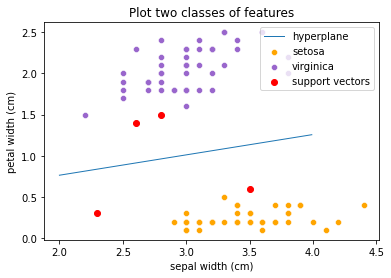

In [9]:
plot_iris(setosa, 'setosa', virginica, 'virginica', 'sepal width (cm)', 'petal width (cm)')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], color='red', label='support vectors')
plt.plot(line_x, line_y, linewidth=1, label='hyperplane')
plt.legend()
plt.show()

### Multiple Kernels with contour map

In [10]:
linear = svm.SVC(kernel='linear')
poly = svm.SVC(kernel='poly', C=2)
rbf = svm.SVC(kernel='rbf')

In [11]:
y = data.get('target')
x = data.get('data')[:][:, [feature_id1, feature_id2]]

No handles with labels found to put in legend.
No handles with labels found to put in legend.


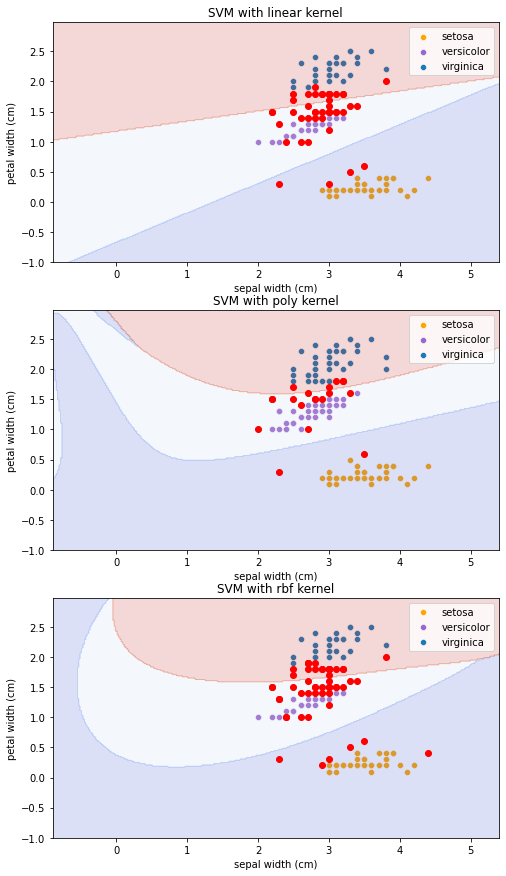

In [12]:
fig, ax = plt.subplots(3,1, figsize=(8,15))
kernels = [linear, poly, rbf]
kernel_names = ['linear', 'poly', 'rbf']
for i, model in enumerate(kernels):
    model.fit(x,y)
    xx, yy = make_meshgrid(x, y)
    plot_dataset(ax[i], setosa, 'setosa', versicolor, 'versicolor', virginica, 'virginica', 'sepal width (cm)', 'petal width (cm)')
    plot_contours(ax[i], model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.2)
    ax[i].scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], color='red', label='support vectors')
    ax[i].set_title(f'SVM with {kernel_names[i]} kernel')
plt.show()

### Circular data

In [13]:
# gamma -  `how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’.`
# C - regularization parameter that controls tolerance to misclassification (the higher C, the less tolerance)
rbf1 = svm.SVC(kernel='rbf', gamma=0.5, C=0.1)
rbf2 = svm.SVC(kernel='rbf', gamma=0.5, C=0.5)
rbf3 = svm.SVC(kernel='rbf', gamma=0.5, C=1)

In [23]:
# Choose for either of the two
X, y = make_circles(n_samples=100, noise=0.1)
# X, y = make_moons(n_samples=100, noise=0.05)

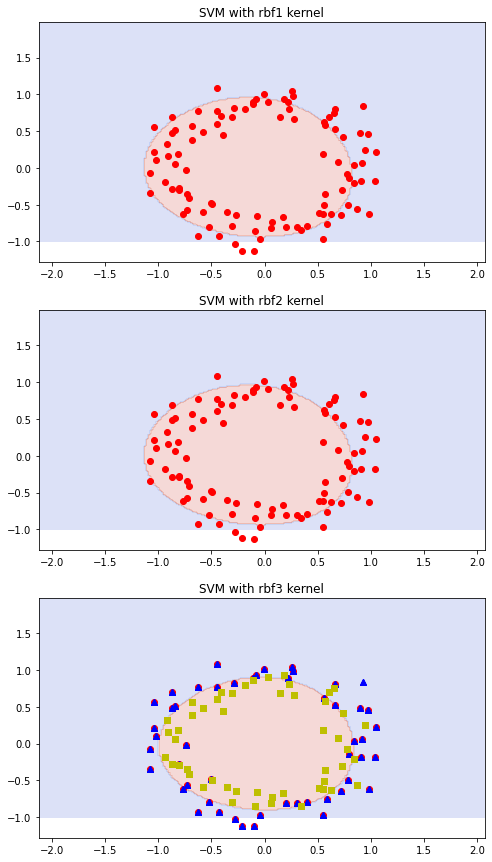

In [24]:
fig, ax = plt.subplots(3,1, figsize=(8,15))
kernels = [rbf1, rbf2, rbf3]
kernel_names = ['rbf1', 'rbf2', 'rbf3']
for i, model in enumerate(kernels):
    model.fit(X,y)
    xx, yy = make_meshgrid(X, y)
    plot_nonlinear(X,y)
    plot_contours(ax[i], model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.2)
    ax[i].scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], color='red', label='support vectors')
    ax[i].set_title(f'SVM with {kernel_names[i]} kernel')
plt.show()